In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
res_errG_day6 = pd.read_csv('../rawCode/res_errG_day6.csv')
res_std_day6 = pd.read_csv('../rawCode/res_std_day6.csv')
res_errG_day10 = pd.read_csv('../rawCode/res_errG_day10.csv')
res_std_day10 = pd.read_csv('../rawCode/res_std_day10.csv')
res_errG_day7 = pd.read_csv('../rawCode/res_errG_day7.csv')
res_std_day7 = pd.read_csv('../rawCode/res_std_day7.csv')


In [3]:
res_total = pd.concat([res_errG_day6, res_std_day6,
           res_errG_day10, res_std_day10,
           res_errG_day7, res_std_day7]).drop(['Unnamed: 0'], axis = 1)
res_total.reset_index(drop= True, inplace=True)
res_total['error_included'] = res_total['error_included'] .astype('int')
res_total.Date = pd.to_datetime(res_total.Date, format = "%Y-%m-%d")

In [4]:
res_total.groupby(['Reconstruction', 'Filter', 'Date']).mean()

error_included  number_of_clusters
Reconstruction Filter      Date                                          
all            ErrGrow all 2022-02-06        0.625000           20.000000
                           2022-02-07        0.642857           21.250000
                           2022-02-10        0.500000            9.233333
               ErrGrow maj 2022-02-06        1.000000          133.708333
                           2022-02-07        0.714286          133.607143
                           2022-02-10        0.600000           53.300000
               std all     2022-02-06        0.666667           98.166667
                           2022-02-07        0.678571          142.321429
                           2022-02-10        0.533333           36.766667
               std maj     2022-02-06        1.000000          356.708333
                           2022-02-07        0.785714          397.464286
                           2022-02-10        0.633333          130.200000
col            ErrGrow     2022-02-06        0.875000          278.958333
                           2022-02-07        0.714286          243.714286
                           2022-02-10        0.566667          121.400000
               std         2022-02-06        0.916667          887.666667
                           2022-02-07        0.714286          857.428571
                           2022-02-10        0.633333          327.000000
row            ErrGrow     2022-02-06        0.916667          289.000000
                           2022-02-07        0.821429          293.428571
                           2022-02-10        0.666667          129.300000
               std         2022-02-06        0.916667          899.208333
                           2022-02-07        0.892857          975.071429
                           2022-02-10        0.700000          313.866667
sub            ErrGrow     2022-02-06        0.875000          284.208333
                           2022-02-07        0.750000          266.250000
                           2022-02-10        0.666667          126.100000
               std         2022-02-06        0.958333          631.625000
                           2022-02-07        0.785714          739.357143
                           2022-02-10        0.700000          266.433333

In [5]:
res_total_seperate = res_total[res_total.Reconstruction != 'all']
res_total_seperate['Date'] = res_total_seperate['Date'].astype('str')
res_total_seperate['Filter'].loc[res_total_seperate.Filter == 'std'] = 'Standard Deviation'
res_total_seperate['Filter'].loc[res_total_seperate.Filter == 'ErrGrow'] = 'Error Growth'
res_total_seperate['Reconstruction'].loc[res_total_seperate.Reconstruction == 'col'] = 'Column Reconstruction'
res_total_seperate['Reconstruction'].loc[res_total_seperate.Reconstruction == 'row'] = 'Row Reconstruction'
res_total_seperate['Reconstruction'].loc[res_total_seperate.Reconstruction == 'sub'] = 'Subimage Reconstruction'


C:\Users\timob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\timob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


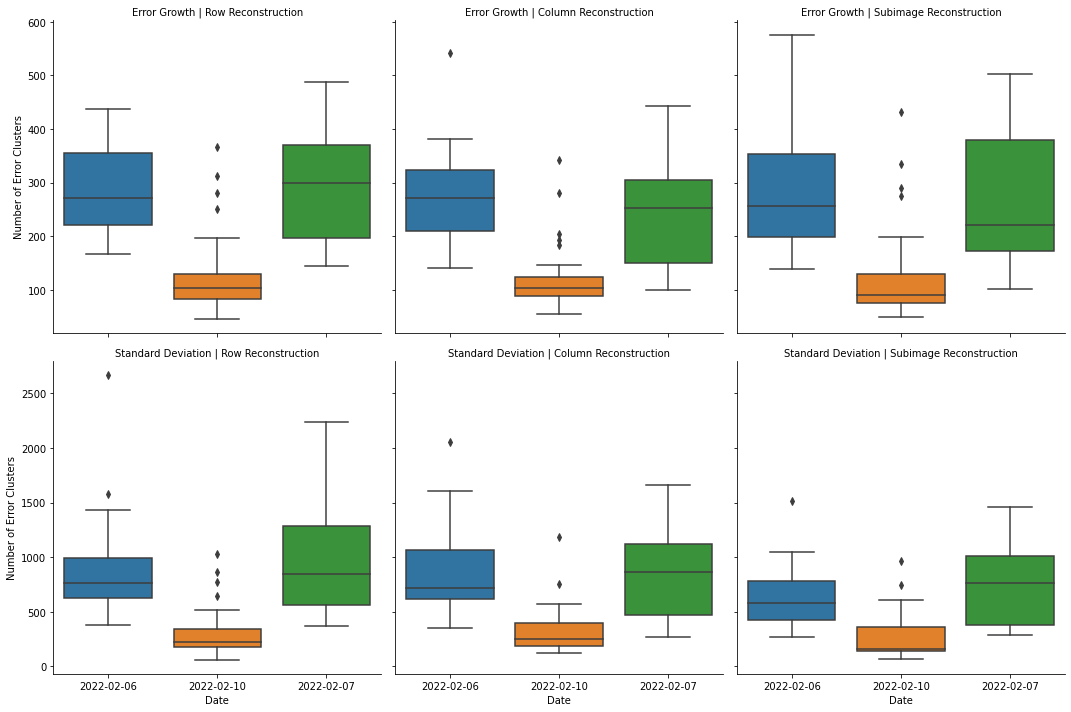

In [6]:
ax = sns.catplot(y="number_of_clusters", kind = 'box', x = 'Date', row = 'Filter', col = 'Reconstruction', sharey ='row',
               data=res_total_seperate)
ax.set(ylabel='Number of Error Clusters')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.savefig('../plots/NOCluster.jpg')

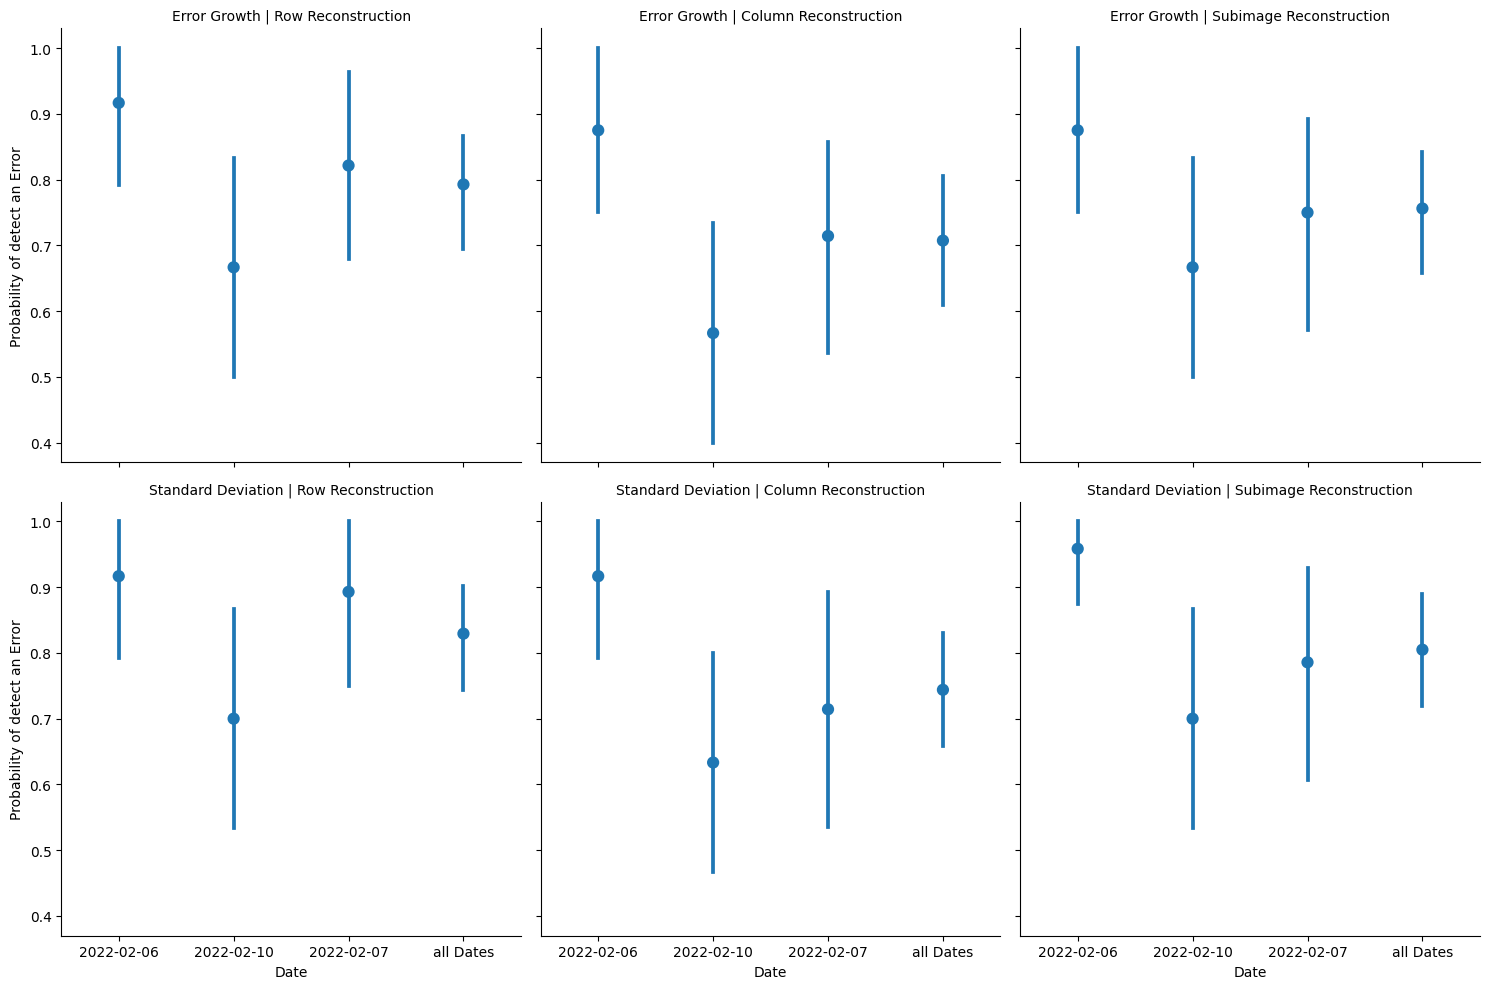

In [7]:
res_total_seperate_allDates = res_total_seperate.copy()
tmp = res_total_seperate.copy()
tmp['Date'] = 'all Dates'
res_total_seperate_allDates = res_total_seperate_allDates.append(tmp)

ax = sns.catplot(y="error_included", kind = 'point', x = 'Date', row = 'Filter', col = 'Reconstruction',
               data=res_total_seperate_allDates, linestyles = 'none')
ax.set(ylabel='Probability of detect an Error')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.savefig('../plots/ProbDetectionSep.jpg')

In [8]:
res_total_seperate.groupby(['Date', 'Filter', 'Reconstruction'])['error_included'].mean()

Date        Filter              Reconstruction         
2022-02-06  Error Growth        Column Reconstruction      0.875000
                                Row Reconstruction         0.916667
                                Subimage Reconstruction    0.875000
            Standard Deviation  Column Reconstruction      0.916667
                                Row Reconstruction         0.916667
                                Subimage Reconstruction    0.958333
2022-02-07  Error Growth        Column Reconstruction      0.714286
                                Row Reconstruction         0.821429
                                Subimage Reconstruction    0.750000
            Standard Deviation  Column Reconstruction      0.714286
                                Row Reconstruction         0.892857
                                Subimage Reconstruction    0.785714
2022-02-10  Error Growth        Column Reconstruction      0.566667
                                Row Reconstruction         0

In [11]:
res_total_all = res_total[res_total.Reconstruction == 'all']
res_total_all['Filter_1'] = res_total_all['Filter'].str.split(' ', expand = True)[0]
res_total_all['Filter_2'] = res_total_all['Filter'].str.split(' ', expand = True)[1]#
res_total_all['Filter_2'].loc[res_total_all.Filter_2 == 'maj'] = 'Majority'
res_total_all['Filter_2'].loc[res_total_all.Filter_2 == 'all'] = 'Unanimity'
res_total_all['Filter_1'].loc[res_total_all.Filter_1 == 'std'] = 'Standard Deviation'
res_total_all['Filter_1'].loc[res_total_all.Filter_1 == 'ErrGrow'] = 'Error Growth'
res_total_all['Date'] = res_total_all['Date'].astype('str')

C:\Users\timob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\timob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\timob\

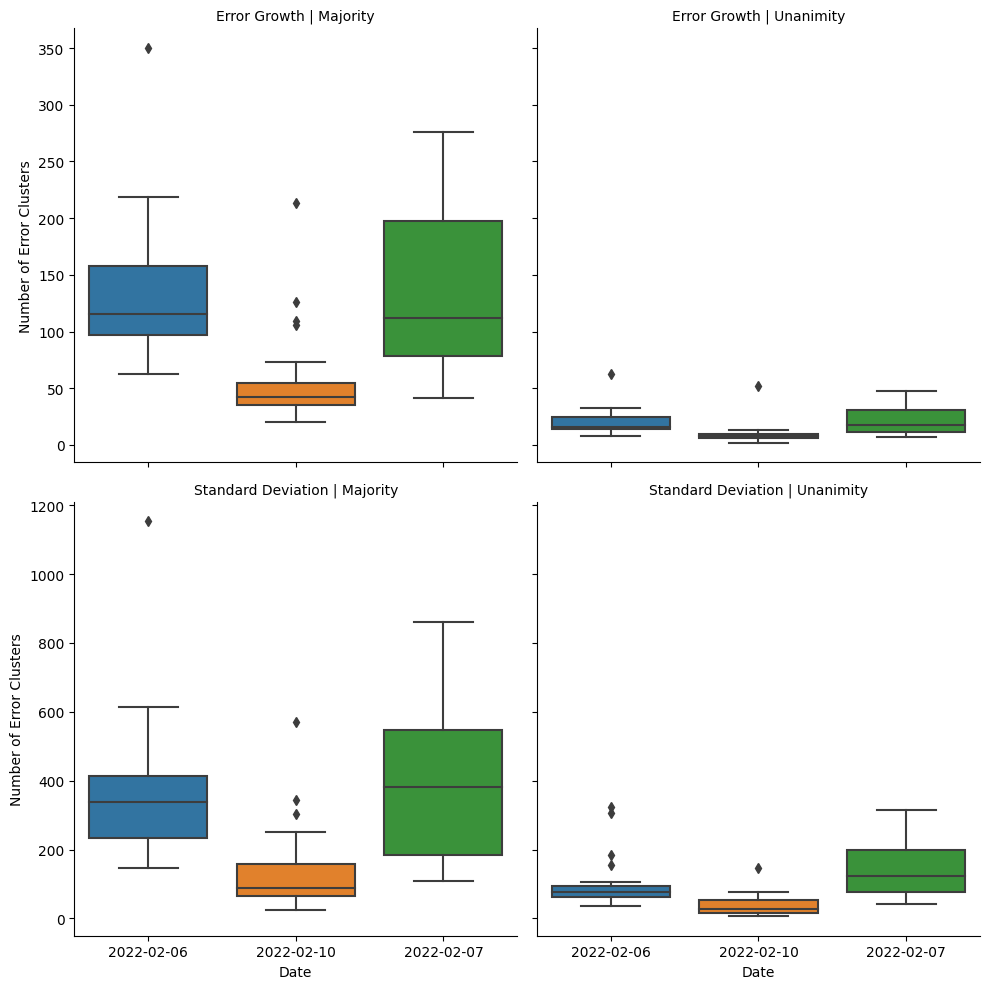

In [12]:
ax = sns.catplot(y="number_of_clusters", kind = 'box', x = 'Date', row = 'Filter_1', col = 'Filter_2', sharey = 'row',
               data=res_total_all)
ax.set(ylabel='Number of Error Clusters')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.savefig('../plots/NOClustersAll.jpg')

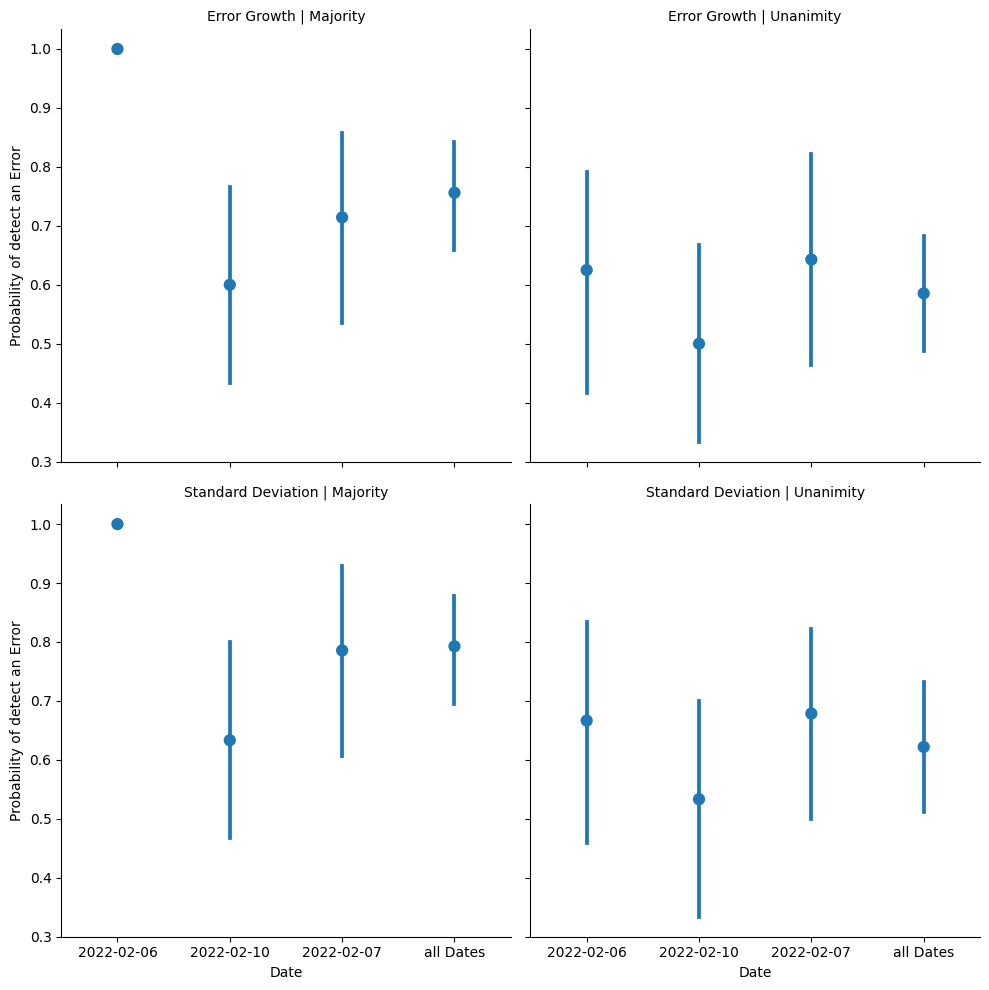

In [13]:
res_total_all_allDates = res_total_all.copy()
tmp = res_total_all.copy()
tmp['Date'] = 'all Dates'
res_total_all_allDates = res_total_all_allDates.append(tmp)

ax = sns.catplot(y="error_included", kind = 'point', x = 'Date', row = 'Filter_1', col = 'Filter_2',
               data=res_total_all_allDates, linestyles = 'none')
ax.set(ylabel='Probability of detect an Error')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.savefig('../plots/ProbDetectionAll.jpg')

In [14]:
res_total.groupby(['Reconstruction', 'Filter', 'Date']).aggregate({'error_included': ['mean'], 'number_of_clusters': ['min', 'max', 'mean']}).reset_index()

Reconstruction       Filter       Date error_included number_of_clusters  \
                                                    mean                min   
0             all  ErrGrow all 2022-02-06       0.625000                  8   
1             all  ErrGrow all 2022-02-07       0.642857                  7   
2             all  ErrGrow all 2022-02-10       0.500000                  2   
3             all  ErrGrow maj 2022-02-06       1.000000                 63   
4             all  ErrGrow maj 2022-02-07       0.714286                 41   
5             all  ErrGrow maj 2022-02-10       0.600000                 20   
6             all      std all 2022-02-06       0.666667                 35   
7             all      std all 2022-02-07       0.678571                 41   
8             all      std all 2022-02-10       0.533333                  7   
9             all      std maj 2022-02-06       1.000000                146   
10            all      std maj 2022-02-07       0.785714                108   
11            all      std maj 2022-02-10       0.633333                 25   
12            col      ErrGrow 2022-02-06       0.875000                140   
13            col      ErrGrow 2022-02-07       0.714286                 99   
14            col      ErrGrow 2022-02-10       0.566667                 55   
15            col          std 2022-02-06       0.916667                355   
16            col          std 2022-02-07       0.714286                269   
17            col          std 2022-02-10       0.633333                123   
18            row      ErrGrow 2022-02-06       0.916667                166   
19            row      ErrGrow 2022-02-07       0.821429                144   
20            row      ErrGrow 2022-02-10       0.666667                 46   
21            row          std 2022-02-06       0.916667                383   
22            row          std 2022-02-07       0.892857                371   
23            row          std 2022-02-10       0.700000                 63   
24            sub      ErrGrow 2022-02-06       0.875000                138   
25            sub      ErrGrow 2022-02-07       0.750000                102   
26            sub      ErrGrow 2022-02-10       0.666667                 49   
27            sub          std 2022-02-06       0.958333                271   
28            sub          std 2022-02-07       0.785714                284   
29            sub          std 2022-02-10       0.700000                 67   

                      
     max        mean  
0     63   20.000000  
1     48   21.250000  
2     52    9.233333  
3    350  133.708333  
4    276  133.607143  
5    213   53.300000  
6    324   98.166667  
7    314  142.321429  
8    146   36.766667  
9   1153  356.708333  
10   860  397.464286  
11   569  130.200000  
12   542  278.958333  
13   443  243.714286  
14   342  121.400000  
15  2059  887.666667  
16  1663  857.428571  
17  1182  327.000000  
18   438  289.000000  
19   488  293.428571  
20   366  129.300000  
21  2664  899.208333  
22  2236  975.071429  
23  1029  313.866667  
24   576  284.208333  
25   503  266.250000  
26   432  126.100000  
27  1512  631.625000  
28  1462  739.357143  
29   961  266.433333

In [17]:
res_total[res_total.error_included == 1].groupby(['Reconstruction', 'Filter', 'Date'])['number_of_clusters'].min()

Reconstruction  Filter       Date      
all             ErrGrow all  2022-02-06     10
                             2022-02-07      8
                             2022-02-10      6
                ErrGrow maj  2022-02-06     63
                             2022-02-07     41
                             2022-02-10     20
                std all      2022-02-06     37
                             2022-02-07     41
                             2022-02-10      8
                std maj      2022-02-06    146
                             2022-02-07    108
                             2022-02-10     25
col             ErrGrow      2022-02-06    140
                             2022-02-07     99
                             2022-02-10     55
                std          2022-02-06    355
                             2022-02-07    269
                             2022-02-10    123
row             ErrGrow      2022-02-06    166
                             2022-02-07    144
                    

In [15]:
res_total.drop(
               [ 'Date'], axis = 1
               ).groupby(
                   ['Reconstruction', 'Filter']
                   ).aggregate(
                       {'error_included': ['mean'], 'number_of_clusters': ['min', 'max', 'mean']}
                       ).reset_index().to_csv('../data/results_summary.csv')